In [1]:
!pip install graphviz==0.9
!pip install pydot
!pip install seaborn==0.9.1


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### 01. HiperParâmetros, overfit e otimização copy 5

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
55,76666.68,0,16,24846.60026
41,57463.74,0,15,23114.95042
42,41296.05,0,10,19485.88872
43,96446.05,0,17,38476.10072
45,64387.60,0,10,23609.01780


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [72.89, 78.67]


In [6]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [8]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.80
Intervalo [72.90, 78.69]


In [9]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.07, 79.29]


#### 01.04. Entendendo o que é um parâmetro

In [10]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.80
Intervalo [72.90, 78.69]


In [11]:
modelo

DecisionTreeClassifier(max_depth=2)

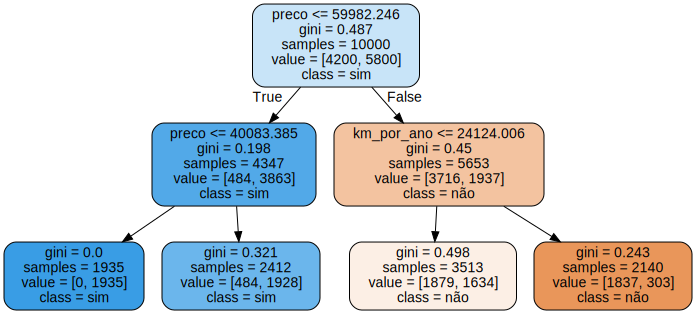

In [12]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [13]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.68
Intervalo [75.57, 81.80]


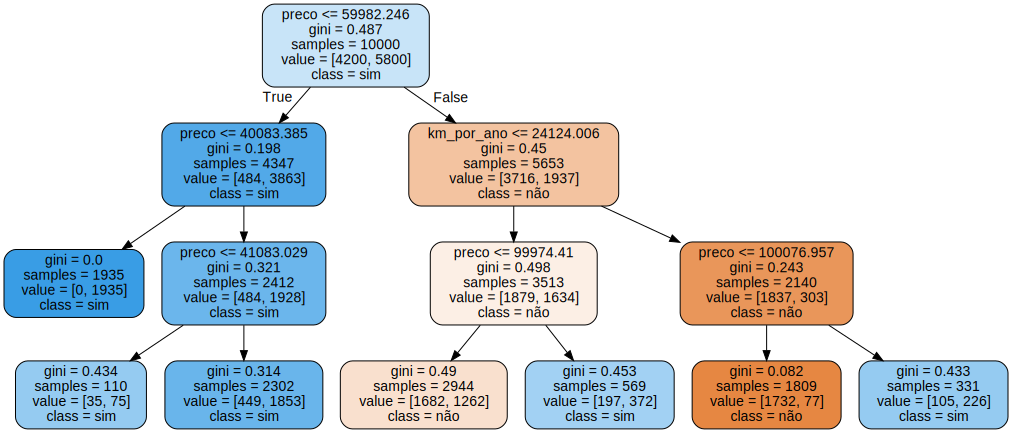

In [14]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [15]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.97
Intervalo [75.03, 78.91]


#### 01.05. Quanto mais complexa a árvore, melhor?

_Testando parâmetros_

In [16]:
def roda_arvore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
    print(f"Árvore max_depth = {max_depth}, média teste = {(results['test_score'].mean() * 100):.2f}")

for i in range(1, 33):
    roda_arvore_de_decisao(i)

Árvore max_depth = 1, média teste = 75.80
Árvore max_depth = 2, média teste = 75.80
Árvore max_depth = 3, média teste = 78.68
Árvore max_depth = 4, média teste = 78.66
Árvore max_depth = 5, média teste = 78.59
Árvore max_depth = 6, média teste = 78.54
Árvore max_depth = 7, média teste = 78.31
Árvore max_depth = 8, média teste = 77.90
Árvore max_depth = 9, média teste = 77.45
Árvore max_depth = 10, média teste = 76.97
Árvore max_depth = 11, média teste = 76.66
Árvore max_depth = 12, média teste = 76.31
Árvore max_depth = 13, média teste = 75.96
Árvore max_depth = 14, média teste = 75.41
Árvore max_depth = 15, média teste = 75.01
Árvore max_depth = 16, média teste = 74.91
Árvore max_depth = 17, média teste = 74.53
Árvore max_depth = 18, média teste = 74.26
Árvore max_depth = 19, média teste = 73.83
Árvore max_depth = 20, média teste = 73.60
Árvore max_depth = 21, média teste = 73.11
Árvore max_depth = 22, média teste = 72.95
Árvore max_depth = 23, média teste = 73.01
Árvore max_depth = 2

In [17]:
def roda_arvore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    # print(f"Árvore max_depth = {max_depth}, média treino = {train_score:.2f}, média teste = {test_score:.2f}")
    tabela = [max_depth, train_score, test_score]
    return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "test"])
resultados.head()

,max_depth,train,test
0,1.0,75.791308,75.795015
1,2.0,75.791308,75.795015
2,3.0,78.751166,78.683167
3,4.0,78.788947,78.663124
4,5.0,78.949014,78.591557


### OVERFIT

<Axes: xlabel='max_depth'>

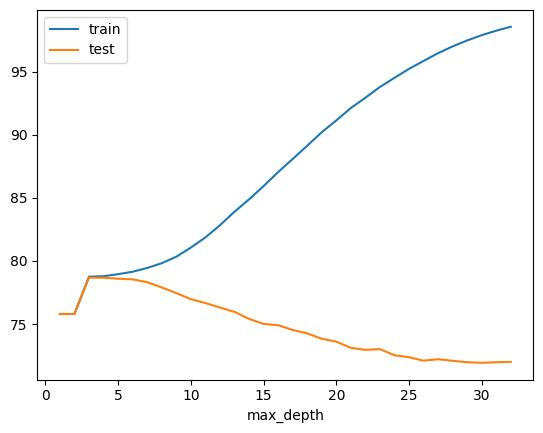

In [18]:
# import seaborn as sns

# sns.lineplot(x="max_depth", y="train", data=resultados)
resultados.plot(x='max_depth', y=['train', 'test'])

In [19]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3.0,78.751166,78.683167
3,4.0,78.788947,78.663124
4,5.0,78.949014,78.591557
5,6.0,79.143373,78.540192
6,7.0,79.442263,78.314519


# 02 Explorando 2 dimensões de hiperparâmetros

[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [20]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    print('Árvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
    tabela = [max_depth, min_samples_leaf, train_score, test_score]
    return tabela

def busca():
   resultados = []
   for max_depth in range(1, 33):
       for min_samples_leaf in [32, 64, 128, 256]:
           tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
           resultados.append(tabela)
   resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "test"])
   return resultados

resultados = busca()
resultados.head()

Árvore max_depth = 1, min_samples_leaf = 32, treino = 75.79, teste = 75.80
Árvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.80
Árvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Árvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Árvore max_depth = 2, min_samples_leaf = 32, treino = 75.79, teste = 75.80
Árvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.80
Árvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Árvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Árvore max_depth = 3, min_samples_leaf = 32, treino = 78.75, teste = 78.68
Árvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.68
Árvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.68
Árvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.68
Árvore max_depth = 4, min_samples_leaf = 32, treino = 78.75, teste = 78.68
Árvore max_depth = 

,max_depth,min_samples_leaf,train,test
0,1.0,32.0,75.791308,75.795015
1,1.0,64.0,75.791308,75.795015
2,1.0,128.0,75.791308,75.795015
3,1.0,256.0,75.791308,75.795015
4,2.0,32.0,75.791308,75.795015


In [21]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4.0,256.0,78.751166,78.683167
19,5.0,256.0,78.751166,78.683167
10,3.0,128.0,78.751166,78.683167
8,3.0,32.0,78.751166,78.683167
13,4.0,64.0,78.751166,78.683167


In [22]:
corr = resultados.corr()

<Axes: >

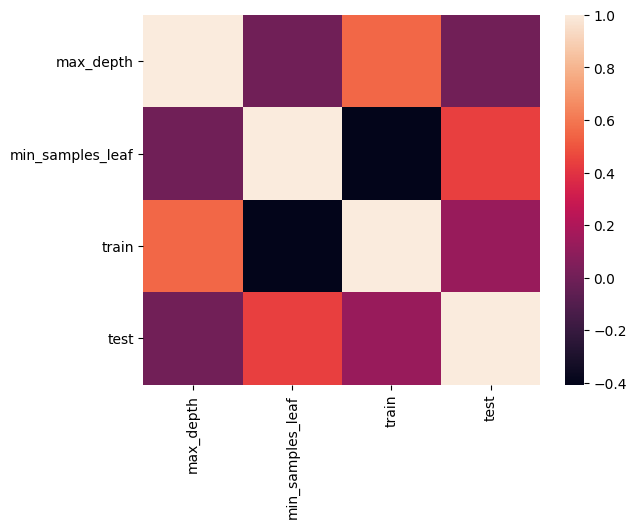

In [24]:
import seaborn as sns

np.bool = np.bool_  # not optimal but works
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

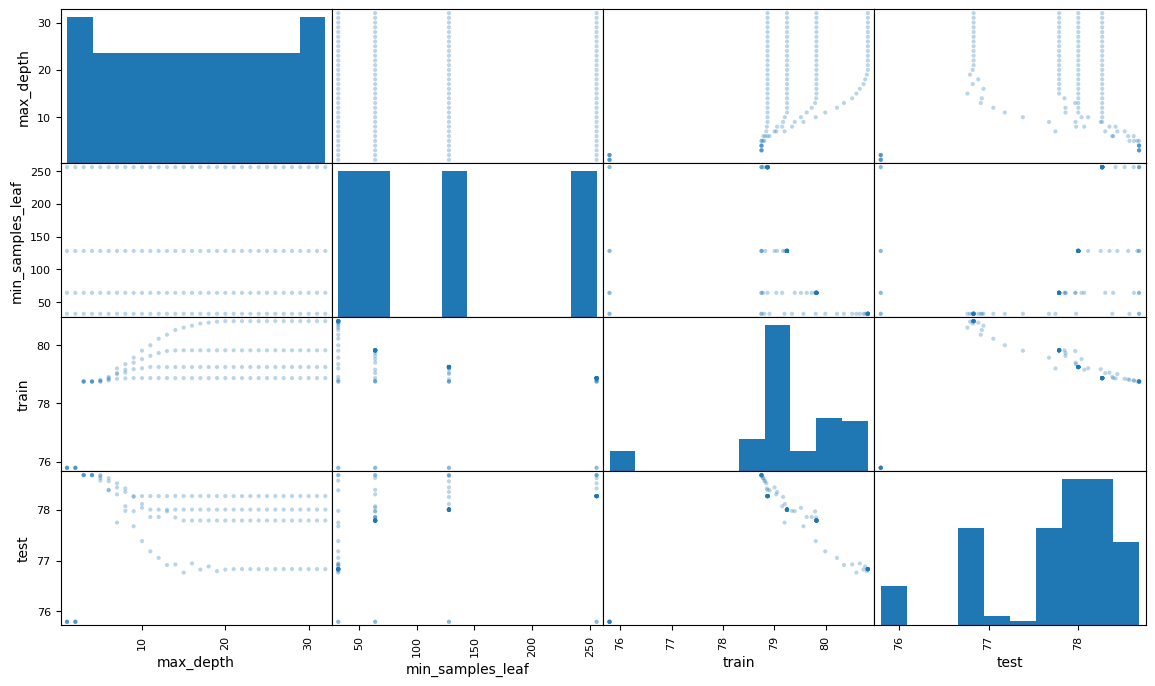

In [25]:
pd.plotting.scatter_matrix(resultados, figsize=(14,8), alpha=0.3)

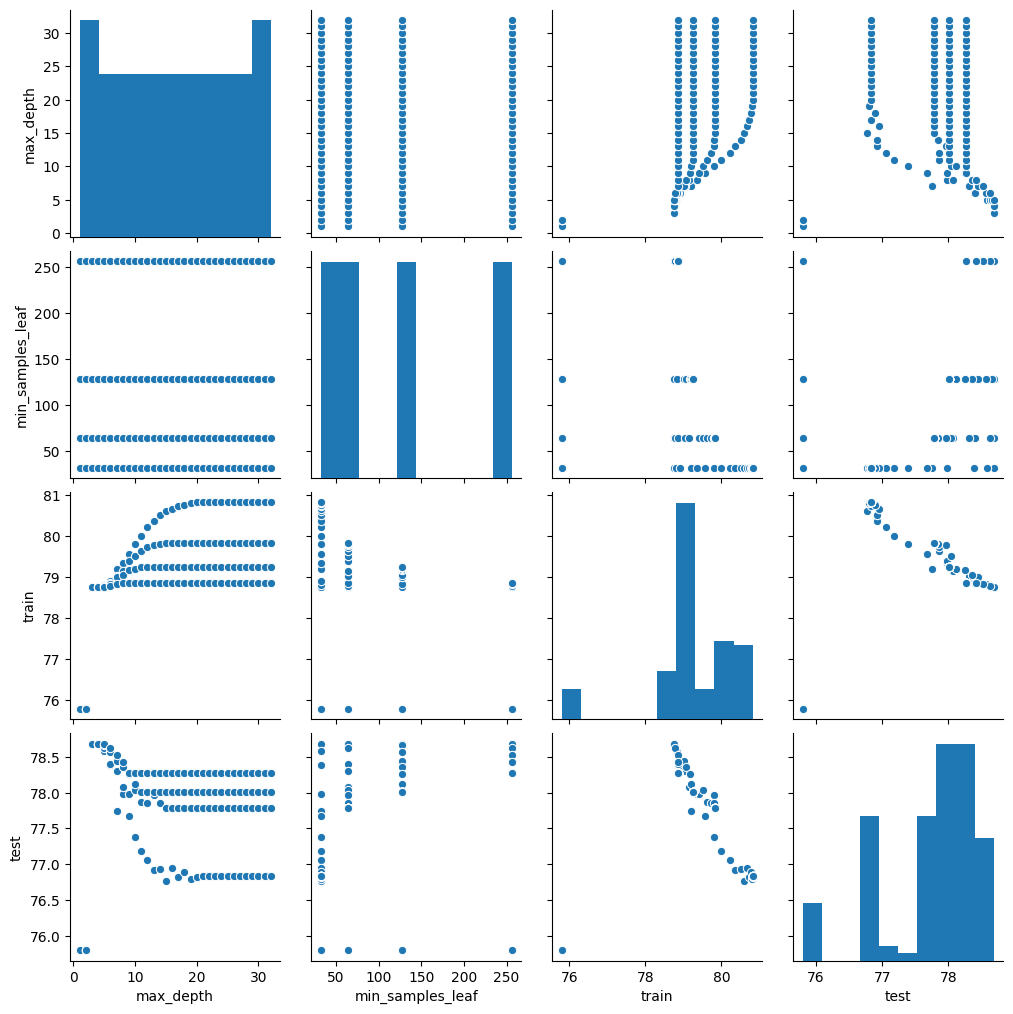

In [26]:
np.float = float  # not optimal but works
np.object = object
sns.pairplot(resultados)

<Axes: >

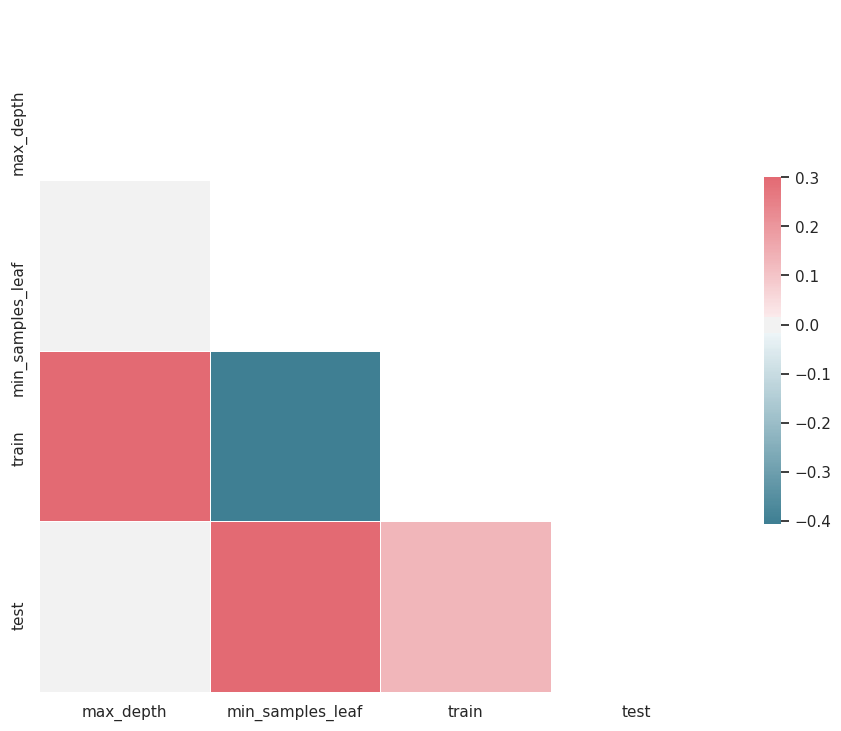

In [27]:
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
def busca():
   resultados = []
   for max_depth in range(1, 33):
       for min_samples_leaf in [128, 192, 256, 512]:
           tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
           resultados.append(tabela)
   resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "test"])
   return resultados

resultados = busca()
resultados.head()

Árvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Árvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.80
Árvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Árvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.80
Árvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Árvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.80
Árvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Árvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.80
Árvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.68
Árvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.68
Árvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.68
Árvore max_depth = 3, min_samples_leaf = 512, treino = 77.52, teste = 77.51
Árvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.68
Árvore max_d

,max_depth,min_samples_leaf,train,test
0,1.0,128.0,75.791308,75.795015
1,1.0,192.0,75.791308,75.795015
2,1.0,256.0,75.791308,75.795015
3,1.0,512.0,75.791308,75.795015
4,2.0,128.0,75.791308,75.795015


In [29]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
18,5.0,256.0,78.751166,78.683167
17,5.0,192.0,78.751166,78.683167
14,4.0,256.0,78.751166,78.683167
8,3.0,128.0,78.751166,78.683167
10,3.0,256.0,78.751166,78.683167


<Axes: >

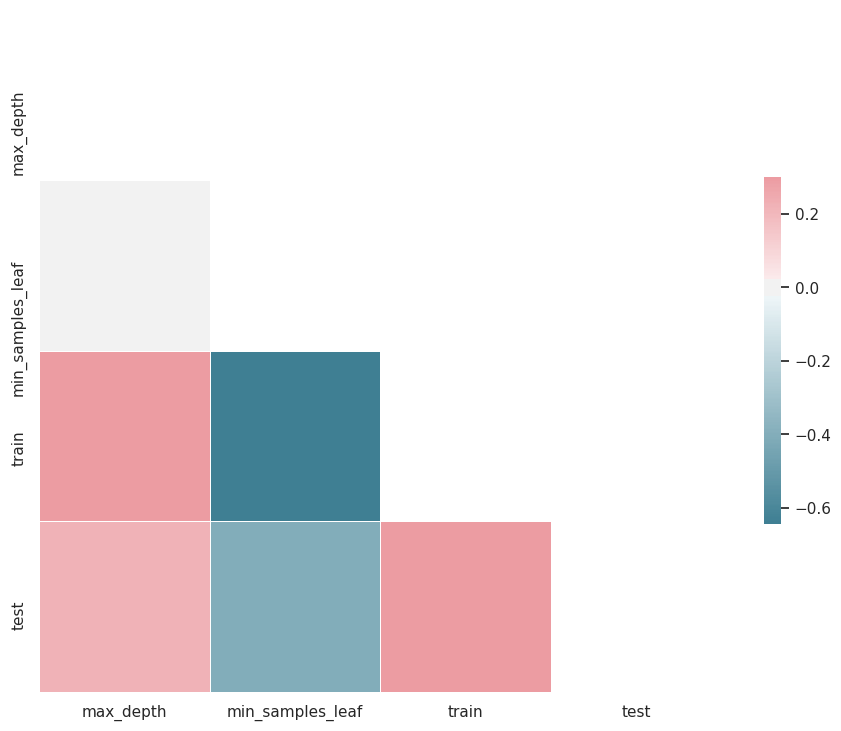

In [30]:
sns.set(style="white")

# Compute the correlation matrix
corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 03.02.Explorando 3 ou mais parâmetros

In [37]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score=True)
    fit_time = results['fit_time'].mean()
    score_time = results['score_time'].mean()
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    # print('Árvore max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, treino = %.2f, teste = %.2f' % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
    tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
    return tabela

def busca():
   resultados = []
   for max_depth in range(1, 33):
       for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
           tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
           resultados.append(tabela)
   resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "min_samples_split", "train", "test", "fit_time", "score_time"])
   return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791308,75.795015,0.003534,0.001011
1,1,32,64,75.791308,75.795015,0.003476,0.000955
2,1,32,128,75.791308,75.795015,0.003470,0.000889
3,1,32,256,75.791308,75.795015,0.003363,0.000913
4,1,64,32,75.791308,75.795015,0.003433,0.000918


In [38]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
62,4,256,128,78.751166,78.683167,0.008116,0.001031
63,4,256,256,78.751166,78.683167,0.008088,0.000984
48,4,32,32,78.751166,78.683167,0.008628,0.001066
76,5,256,32,78.751166,78.683167,0.009105,0.001059
78,5,256,128,78.751166,78.683167,0.009213,0.001176


<Axes: >

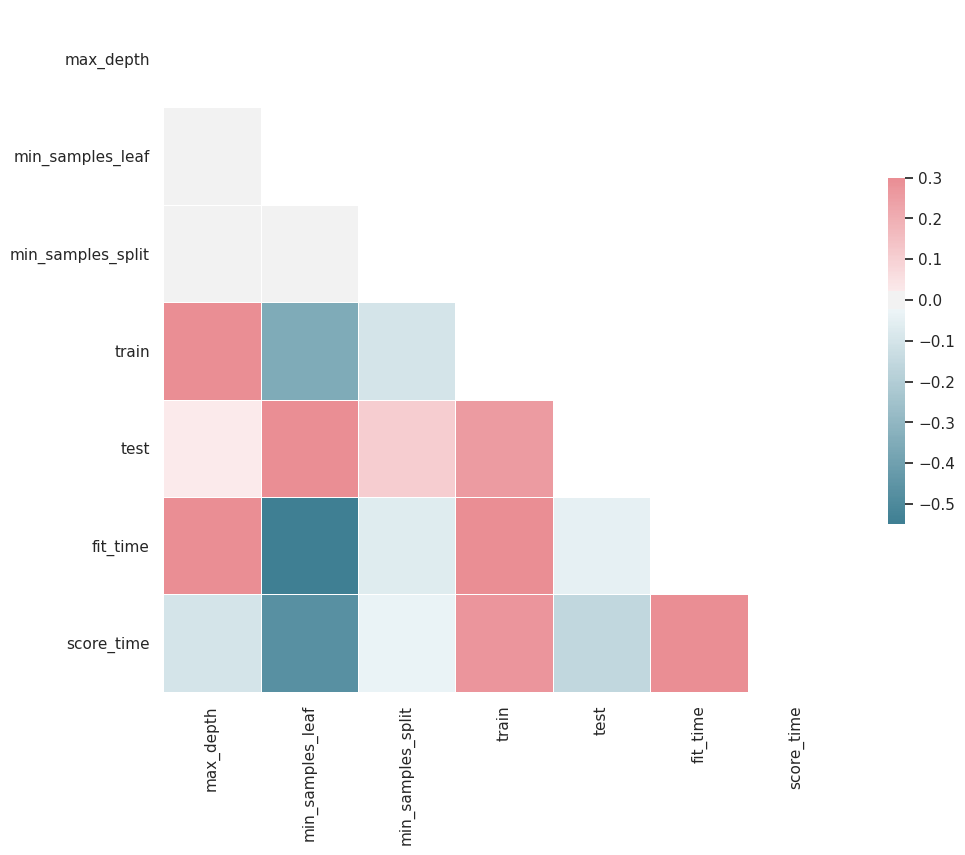

In [39]:
sns.set(style="white")

# Compute the correlation matrix
corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 04.02.Usando o GridSearchCV

## Explorando espaço de hiperparâmeetros com o GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv = GroupKFold(n_splits=10))
busca.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006978,0.000473,0.001077,0.000224,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
1,0.006797,0.000175,0.001030,0.000239,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
2,0.006790,0.000196,0.000996,0.000131,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
3,0.006718,0.000173,0.000976,0.000150,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
4,0.006682,0.000131,0.000974,0.000122,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1


In [41]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.68316661476126


In [42]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [44]:
from sklearn.metrics import accuracy_score

# evitar essa abordagem pois estará sendo otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print('Accuracy para os dados foi %.2f' % accuracy)

Accuracy para os dados foi 78.75


# 05.02.Nested cross validation e validando o melhor modelo

## Como ter uma estimativa sem esse vício nos dados que eu já vi?

No caso de 'cross validation' com busca de hiperparâmetros, fazemos uma nova validação cruzada, Chama-se 'nested cross validation'.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=GroupKFold(n_splits=10), groups=dados.modelo)

### Infelizmente como o Pandas não suporta 'nested validation' com o 'GroupKFold' não conseguimos prever o resultado para novos grupos.

In [47]:
from sklearn.model_selection import GridSearchCV, KFold

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv = KFold(n_splits=5, shuffle=True))
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006651,0.000328,0.001126,0.000272,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
1,0.006182,0.000107,0.001140,0.000182,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
2,0.006213,0.000209,0.000965,0.000095,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
3,0.006242,0.000118,0.001027,0.000058,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
4,0.006132,0.000095,0.000958,0.000094,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1


In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
scores

array([0.7675, 0.7865, 0.784 , 0.795 , 0.801 ])

In [50]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [51]:
imprime_score(scores)

Accuracy médio 78.68
Intervalo [76.40, 80.96]


In [52]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

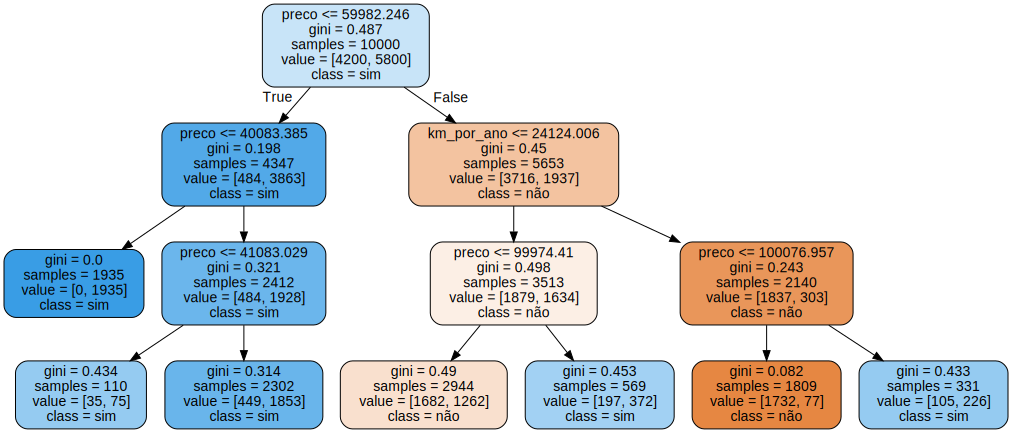

In [53]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names=features)

graph = graphviz.Source(dot_data)
graph